# Lab 2

# Content
* [Data Preparation](#data-preparation)
    - [Part 1. Data Processing](#data-preparation1)
    - [Part 2. Final Datasets](#data-preparation2)
* [Modeling and Evaluation](#model-and-evaluation)
    - [Part 1. Evaluation Metrics](#model-and-evaluation1)
    - [Part 2. Train and Test Splits](#model-and-evaluation2)
    - [Part 3. Models for Tasks](#model-and-evaluation3)
        - [Part 3.a. Models for Classification](#model-and-evaluation3a)
        - [Part 3.b. Models for Regression](#model-and-evaluation3b)
    - [Part 4. Model Analysis with Visualization](#model-and-evaluation4)
    - [Part 5. Model Comparison](#model-and-evaluation5)
    - [Part 6. Feature Importance](#model-and-evaluation6)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

# Data Preparation <a id='data-preparation'/>

### Part 1. Data Processing <a id='data-preparation1'/>

*Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.*

##### Data Importing and Cleaning

In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv') # read in the csv file
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [2]:
import math
from datetime import date


hotel_bookings_transform = hotel_bookings
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company', 'country'])

hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)


hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)

# Convert Date to Ordinal
import datetime as dt
hotel_bookings_transform['reservation_status_date'] = pd.to_datetime(hotel_bookings_transform['reservation_status_date'])
hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.toordinal)

hotel_bookings_transform=hotel_bookings_transform.assign(booking_day_of_year = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_day_of_year']=pd.to_datetime(hotel_bookings_transform.booking_day_of_year)
hotel_bookings_transform['booking_day_of_year']=hotel_bookings_transform['booking_day_of_year'].map(lambda x: x.toordinal() - date(x.year, 1, 1).toordinal() + 1)


hotel_bookings_transform=hotel_bookings_transform.drop(columns=['arrival_date_year','reservation_status_date'])
#hotel_bookings_transform['booking_date']=hotel_bookings_transform['booking_date'].map(dt.datetime.toordinal)

##### Normalization

In [3]:
X_cls=hotel_bookings_transform.drop(columns=['is_canceled','reservation_status','meal'])
y_cls=hotel_bookings_transform.is_canceled

X_reg=hotel_bookings_transform.drop(columns=['adr','reservation_status','meal'])
y_reg=hotel_bookings_transform.adr

columns_cls = X_cls.columns
columns_reg = X_reg.columns

columns_cls, columns_reg

(Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_week_number',
        'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies',
        'market_segment', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_type', 'assigned_room_type', 'booking_changes',
        'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
        'required_car_parking_spaces', 'total_of_special_requests',
        'booking_day_of_year'],
       dtype='object'),
 Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
        'arrival_date_week_number', 'arrival_date_day_of_month',
        'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
        'babies', 'market_segment', 'distribution_channel', 'is_repeated_guest',
        'previous_cancellations', 'previous_bookings_not_canceled',
        'reserved_room_t

In [4]:
from sklearn import preprocessing
scaler_cls = preprocessing.StandardScaler().fit(X_cls)
scaler_reg = preprocessing.StandardScaler().fit(X_reg)

X_cls_scaled = pd.DataFrame(scaler_cls.transform(X_cls),columns=columns_cls)
X_reg_scaled = pd.DataFrame(scaler_reg.transform(X_reg),columns=columns_reg)

In [5]:
X_cls_scaled

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booking_day_of_year
0,1.407224,2.227051,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,...,0.595363,0.356939,4.260101,-0.373175,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694,-0.023432
1,1.407224,5.923385,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,-0.081579,...,0.595363,0.356939,5.793131,-0.373175,-0.131924,-0.237979,-2.015038,-0.254873,-0.720694,-0.023432
2,1.407224,-0.907814,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,...,-0.582996,0.356939,-0.338990,-0.373175,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694,-0.023432
3,1.407224,-0.851667,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,-0.081579,...,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.530935,-0.254873,-0.720694,-0.023432
4,1.407224,-0.842309,0.144799,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260659,-0.081579,...,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.075810,-0.254873,0.540666,-0.023432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.710619,-0.758089,0.468360,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260659,-0.081579,...,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.112616,-0.254873,-0.720694,0.612376
119386,-0.710619,-0.018822,0.468360,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260659,-0.081579,...,1.773723,1.421475,-0.338990,-0.373175,-0.131924,-0.237979,2.445779,-0.254873,1.802026,0.622973
119387,-0.710619,-0.655153,0.468360,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,...,1.184543,0.889207,-0.338990,-0.373175,-0.131924,-0.237979,1.105733,-0.254873,4.324746,0.622973
119388,-0.710619,0.046682,0.468360,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,-0.081579,...,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,0.050833,-0.254873,-0.720694,0.622973


In [6]:
X_reg_scaled

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,booking_day_of_year
0,1.407224,-0.76704,2.227051,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,...,-0.091555,0.595363,0.356939,4.260101,-0.373175,-0.131924,-0.237979,-0.254873,-0.720694,-0.023432
1,1.407224,-0.76704,5.923385,0.144799,-0.012141,-1.685297,-0.928890,-1.310240,0.247897,-0.260659,...,-0.091555,0.595363,0.356939,5.793131,-0.373175,-0.131924,-0.237979,-0.254873,-0.720694,-0.023432
2,1.407224,-0.76704,-0.907814,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,...,-0.091555,-0.582996,0.356939,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,-0.720694,-0.023432
3,1.407224,-0.76704,-0.851667,0.144799,-0.012141,-1.685297,-0.928890,-0.786207,-1.478447,-0.260659,...,-0.091555,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,-0.720694,-0.023432
4,1.407224,-0.76704,-0.842309,0.144799,-0.012141,-1.685297,-0.928890,-0.262174,0.247897,-0.260659,...,-0.091555,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,0.540666,-0.023432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.710619,-0.76704,-0.758089,0.468360,0.575875,1.617366,1.073895,1.309924,0.247897,-0.260659,...,-0.091555,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,-0.720694,0.612376
119386,-0.710619,-0.76704,-0.018822,0.468360,0.575875,1.731251,1.073895,1.309924,1.974242,-0.260659,...,-0.091555,1.773723,1.421475,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,1.802026,0.622973
119387,-0.710619,-0.76704,-0.655153,0.468360,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,...,-0.091555,1.184543,0.889207,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,4.324746,0.622973
119388,-0.710619,-0.76704,0.046682,0.468360,0.575875,1.731251,1.073895,1.309924,0.247897,-0.260659,...,-0.091555,-0.582996,-0.707596,-0.338990,-0.373175,-0.131924,-0.237979,-0.254873,-0.720694,0.622973


Verifying each feature has a mean of zero and the standard deviation should be 1 for classification:

In [7]:
print('classification scaler mean:')
print(X_cls_scaled.mean(axis=0),'\n')
print('classification scaler std:')
print(X_cls_scaled.std(axis=0),'\n')

classification scaler mean:
hotel                            -2.148285e-13
lead_time                         3.358325e-16
arrival_date_month               -1.221612e-14
arrival_date_week_number          4.093983e-15
arrival_date_day_of_month        -9.159196e-16
stays_in_weekend_nights           3.928971e-14
stays_in_week_nights             -2.182022e-14
adults                            5.708995e-15
children                         -6.989886e-16
babies                            5.955017e-15
market_segment                    4.484909e-15
distribution_channel              2.185129e-14
is_repeated_guest                -3.493540e-14
previous_cancellations            1.741766e-14
previous_bookings_not_canceled   -1.286381e-15
reserved_room_type                1.246924e-13
assigned_room_type                9.462049e-14
booking_changes                  -7.015186e-14
deposit_type                      1.754553e-13
days_in_waiting_list             -1.846956e-14
customer_type                   

Verifying each feature has a mean of zero and the standard deviation should be 1 for regression:

In [8]:
print('regression scaler mean:')
print(X_reg_scaled.mean(axis=0),'\n')
print('regression scaler std:')
print(X_reg_scaled.std(axis=0),'\n')

regression scaler mean:
hotel                            -2.148285e-13
is_canceled                      -1.376344e-13
lead_time                         3.358325e-16
arrival_date_month               -1.221612e-14
arrival_date_week_number          4.093983e-15
arrival_date_day_of_month        -9.159196e-16
stays_in_weekend_nights           3.928971e-14
stays_in_week_nights             -2.182022e-14
adults                            5.708995e-15
children                         -6.989886e-16
babies                            5.955017e-15
market_segment                    4.484909e-15
distribution_channel              2.185129e-14
is_repeated_guest                -3.493540e-14
previous_cancellations            1.741766e-14
previous_bookings_not_canceled   -1.286381e-15
reserved_room_type                1.246924e-13
assigned_room_type                9.462049e-14
booking_changes                  -7.015186e-14
deposit_type                      1.754553e-13
days_in_waiting_list             -1.

##### Feature Selection for Classification

In [9]:
correlated_features = []
correlation_matrix = X_cls_scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: {}'.format(correlated_features))

Highly correlated feature pairs are: [['arrival_date_month', 'arrival_date_week_number'], ['market_segment', 'distribution_channel'], ['reserved_room_type', 'assigned_room_type'], ['arrival_date_month', 'booking_day_of_year'], ['arrival_date_week_number', 'booking_day_of_year']]


In [10]:
# Decided to drop the following features from the highly correlated pairs
X_cls_scaled=X_cls_scaled.drop(['distribution_channel', 'arrival_date_month','assigned_room_type','booking_day_of_year'], axis=1)

In [ ]:
# Using randomforest to run RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfc = RandomForestClassifier(random_state=10)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_cls_scaled, y_cls)

In [12]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 13


In [ ]:
# Plotting RFE result

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('RFE with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

plt.show()

In [ ]:
# Identifying which feature is Selected(= identified as True)

print(X_cls_scaled.columns[np.where(rfecv.support_ == True)[0]])

In [ ]:
# Dropping those features that are identified as not important
X_cls_sel=X_cls_scaled[X_cls_scaled.columns[np.where(rfecv.support_ == True)[0]]]

In [ ]:
# Plotting features in the order of importance 

dset = pd.DataFrame()
dset['attr'] = X_cls_sel.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

##### Feature Selection for Regression

In [ ]:
correlated_features = []
correlation_matrix = X_reg_scaled.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            
            correlated_features.append([correlation_matrix.columns[j],colname])
            
            
print('Highly correlated feature pairs are: {}'.format(correlated_features))

In [ ]:
X_reg_scaled=X_reg_scaled.drop(['distribution_channel', 'arrival_date_month','assigned_room_type','booking_day_of_year'], axis=1)

In [ ]:
# Using randomforest to run RFE

from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import ShuffleSplit 
from sklearn.ensemble import RandomForestRegressor

# rfc = linear_model.Lasso(alpha=0.1, random_state=10)
rfc = RandomForestRegressor(random_state=10)
# rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='r2')

rfecv = RFECV(estimator=rfc, step=1, cv=ShuffleSplit(n_splits=5, test_size=0.20, random_state=10), scoring='r2')

rfecv.fit(X_reg_scaled, y_reg)

In [ ]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

In [ ]:
# Plotting RFE result

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title('RFE with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=2)

plt.show()

In [ ]:
# Identifying which feature is Selected(= identified as True)

print(X_reg_scaled.columns[np.where(rfecv.support_ == True)[0]])

In [ ]:
# Dropping those features that are identified as not important
X_reg_sel=X_reg_scaled[X_reg_scaled.columns[np.where(rfecv.support_ == True)[0]]]

In [ ]:
# Plotting features in the order of importance 

dset = pd.DataFrame()
dset['attr'] = X_reg_sel.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=True)


plt.figure(figsize=(8, 8))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
### Add Clean up for Outlier

### Part 2. Final Datasets <a id='data-preparation2'/>

*Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created).*

##### Dataset for Classification

    For Classification, we ran RFECV with Random forest and extract below features:
- lead_time
- deposit_type
- adr
- arrival_date_week_number
- arrival_date_day_of_month
- market_segment
- total_of_special_requests
- stays_in_week_nights
- previous_cancellations
- stays_in_weekends_nights
- customer_type
- reserved_room_type
- booking_changes   

##### Dataset for Regression

    For Regression, we ran RFECV with Random Regressor and extract below features
- arrival_date_week_number
- reserved_room_type
- lead_time
- hotel
- market_segment
- arrival_date_day_of_month
- children
- adults
- stays_in_week_nights
- stays_in_weekends_nights
- booking_changes
- total_of_special_requests
- days_in_waiting_list
- customer_type
- is_canceled
- deposit_type
- previous_cancellations
- is_repeated_guest
- required_car_parking_spaces

# Modeling and Evaluation <a id='model-and-evaluation'/>

### Part 1: Evaluation Metrics <a id='model-and-evaluation1'/>

*Choose and explain your evaluation metrics that you will use (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.*

    For classification model we use ... because ...

    For regression model we use ... because ...

### Part 2: Train and Test Splits <a id='model-and-evaluation2'/>

*Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. For example, if you are using time series data then you should be using continuous training and testing sets across time.*

In [126]:
from sklearn.model_selection import StratifiedShuffleSplit 

cv_cls = StratifiedShuffleSplit(n_splits=10, test_size= 0.2, random_state=10)

    We use training and testing splits with StratifiedShuffleSplit for Classification. StratifiedShuffleSplit is good when there are imbalance weight of classes. Our target, is_canceled, feature has more weight of positive, non-canceled, then the negative, canceled, so we choosed the StratifiedShuffleSplit. We applied 10 folds and 80% train and 20% test size.

In [156]:
from sklearn.model_selection import ShuffleSplit

cv_reg = ShuffleSplit(n_splits=10, test_size= 0.2, random_state=10) 

    We use training and testing splits with ShuffleSplit because we want to shuffle the target variables to give more randomness. We applied 10 folds and 80% train and 20% test size.

### Part 3. Models for Tasks

#### Part 3.a: Models for Classification <a id='model-and-evaluation3a'/>

*Create three different classification/regression models for each task (e.g., random forest, KNN, and SVM for task one and the same or different algorithms for task two). Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization performance using your chosen metric. You must investigate different parameters of the algorithms!*

##### KNN

In [115]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier



clf = KNeighborsClassifier(n_neighbors=3)

yhat = np.zeros(y_cls.shape) # we will fill this with predictions

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    clf.fit(X_train,y_train)
    yhat[test_indices] = clf.predict(X_test)

total_accuracy = mt.accuracy_score(y_cls, yhat)
print ('KNN accuracy', total_accuracy)

KNN accuracy 0.7910293994471899


##### Random Forest

In [116]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

Accuracy 0.8347935337968004


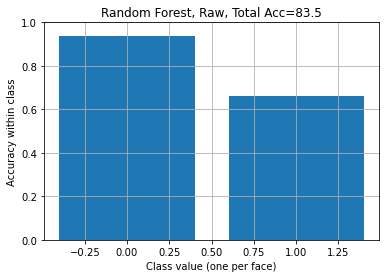

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1, oob_score=True)

yhat = np.zeros(y_cls.shape) # we will fill this with predictions

# now iterate through and get predictions, saved to the correct row in yhat
for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    clf.fit(X_train,y_train)
    yhat[test_indices] = clf.predict(X_test)
    
total_accuracy = mt.accuracy_score(y_cls, yhat)
print ('Accuracy', total_accuracy)
plot_class_acc(y_cls,yhat,title="Random Forest, Raw")

##### Logistic Regression

In [118]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics as mt
from sklearn.model_selection import cross_val_score

for train_indices, test_indices in cv_cls.split(X_cls_sel,y_cls): 
    X_train = X_cls_sel.iloc[train_indices]
    y_train = y_cls.iloc[train_indices]
    
    X_test = X_cls_sel.iloc[test_indices]
    y_test = y_cls.iloc[test_indices]
    
logreg = LogisticRegression(random_state=10).fit(X_train,y_train)
logreg

print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y_cls,X_cls_sel)
result=logit_model.fit()
print(result.summary())

Training set score: 0.788
Test set score: 0.782
Optimization terminated successfully.
         Current function value: 0.483765
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119390
Model:                          Logit   Df Residuals:                   119377
Method:                           MLE   Df Model:                           12
Date:                Wed, 10 Mar 2021   Pseudo R-squ.:                  0.2661
Time:                        02:14:54   Log-Likelihood:                -57757.
converged:                       True   LL-Null:                       -78699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
lead_time                     

##### Decision Tree

##### Naive Bayes

#### Part 3.b: Models for Regression <a id='model-and-evaluation3b'/> 

In [76]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

In [77]:

#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
#https://stackoverflow.com/questions/17197492/root-mean-square-error-in-python
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

##### Support Vector Regression

In [78]:
#Create a Linear regression object and perform a grid search to find the best parameters
from sklearn.svm import SVR
reg = SVR()

#Set up SVR parameters to test (WARNING: Creates 80 models!!!) 
costs = [0.001, 0.1]
defGamma = 1 / X_reg_sel.shape[1]  #This is the default value for the gamma parameter
gammas = [defGamma, 0.1]
kernels = ['rbf','linear']
parameters = {'C': costs, 'gamma' : gammas, 'kernel': kernels}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_reg_sel, y_reg)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed: 55.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=10, test_size=0.2, train_size=None),
             estimator=SVR(), n_jobs=8,
             param_grid={'C': [0.001, 0.1], 'gamma': [0.05263157894736842, 0.1],
                         'kernel': ['rbf', 'linear']},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [79]:

#Display the best estimator parameters
regGridSearch.best_estimator_

SVR(C=0.1, gamma=0.05263157894736842)

In [80]:

from sklearn.svm import SVR

#Create a regression estimator with best parameters for cross validation
regEstimator = SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                   gamma=0.0016313213703099511, kernel='rbf', max_iter=-1, shrinking=True,
                   tol=0.001, verbose=False)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_reg_sel, y_reg, cv_reg)

The average MAE for all cv folds is: 			 35.443
The average MAE percentage (MAPE) for all cv folds is: 	 42.473
The average RMSE for all cv folds is: 			 48.259
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,35.521926,40.983743,48.231561
1,35.391718,44.037935,48.424357
2,35.415893,42.397539,48.119841


##### Linear

In [154]:
#Make new estimator compatible for use with GridSearchCV() and cross_validate()
# -  Cap predict function for LinearRegression between 0 and 100
# -  See: Roll your own estimator links above for details. 
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 0, 100)

In [155]:

#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = CappedLinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_reg_sel, y_reg)

Fitting 119390 folds for each of 4 candidates, totalling 477560 fits


KeyboardInterrupt: 

In [ ]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

In [ ]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_reg_sel, y_reg, cv_reg)

##### Lasso

In [ ]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_reg_sel, y_reg)

In [ ]:
#Display the best estimator parameters
regGridSearch.best_estimator_

In [ ]:
from sklearn.linear_model import Lasso

#Create a regression estimator with best parameters for cross validation
regEstimator = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=10000,
                     normalize=True, positive=False, precompute=True, random_state=0,
                     selection='cyclic', tol=0.0001, warm_start=True)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_reg_sel, y_reg, cv_reg)

##### KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


##Making subset smaller to only use top importance
X_reg_sel_subset  = X_reg_sel['arrival_date_week_number','reserved_room_type','lead_time','hotel','market_segment']

grid_params = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

#using grid search value
gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params,
    verbose = 1,
    cv = cv_reg,
    n_jobs = -1
)

gs.fit(X_reg_sel,y_reg)


### Part 4: Model Analysis with Visualizations <a id='model-and-evaluation4'/>

*Analyze the results using your chosen method of evaluation. Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.*

### Part 5: Model Comparison <a id='model-and-evaluation5'/>

*Discuss the advantages of each model for each classification task, if any. If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods. You must use statistical comparison techniques—be sure they are appropriate for your chosen method of validation as discussed in unit 7 of the course.*

### Part 6: Feature Importance <a id='model-and-evaluation6'/>

*Which attributes from your analysis are most important? Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.*

# Deployment <a id='deployment'/>

*How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?*

# Exceptional Work <a id='exceptional-work'/>

*You have free reign to provide additional analyses. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?*